In [1]:
import cv2
import os

In [2]:
print(cv2.__version__)

4.6.0


In [3]:
mainFolder='Images'
myFolders=os.listdir(mainFolder)
print(myFolders)

['20230124_020100.jpg', '20230124_020103.jpg', '20230124_020107.jpg']


In [4]:
path=mainFolder
myList=os.listdir(path)
print(myList)

['20230124_020100.jpg', '20230124_020103.jpg', '20230124_020107.jpg']


In [5]:
images=[]
for image in myList:
    current=cv2.imread(f'{path}/{image}')
    current=cv2.resize(current,(0,0),None,0.2,0.2)
    images.append(current)

In [6]:
cv2.imshow('image1',images[0])

In [8]:
stitcher=cv2.Stitcher.create()
(status,result)=stitcher.stitch(images)

if(status==cv2.STITCHER_OK):
    print('Map stitched successfully')
    cv2.imshow('folder',result)
    cv2.waitKey(1)
else:
    print('Map stitching failed')

Map stitched successfully


In [10]:
cv2.imwrite('result.jpeg',result)

True

In [2]:
import time
from PIL import Image
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
os.environ["TFHUB_DOWNLOAD_PROGRESS"] = "True"

In [3]:
def preprocess_image(image_path):
  """ Loads image from path and preprocesses to make it model ready
      Args:
        image_path: Path to the image file
  """
  hr_image = tf.image.decode_image(tf.io.read_file(image_path))
  # If PNG, remove the alpha channel. The model only supports
  # images with 3 color channels.
  if hr_image.shape[-1] == 4:
    hr_image = hr_image[...,:-1]
  hr_size = (tf.convert_to_tensor(hr_image.shape[:-1]) // 4) * 4
  hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, hr_size[0], hr_size[1])
  hr_image = tf.cast(hr_image, tf.float32)
  return tf.expand_dims(hr_image, 0)

def save_image(image, filename):
  """
    Saves unscaled Tensor Images.
    Args:
      image: 3D image tensor. [height, width, channels]
      filename: Name of the file to save.
  """
  if not isinstance(image, Image.Image):
    image = tf.clip_by_value(image, 0, 255)
    image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  image.save("%s.jpg" % filename)
  print("Saved as %s.jpg" % filename)

In [4]:
%matplotlib inline
def plot_image(image, title=""):
  """
    Plots images from image tensors.
    Args:
      image: 3D image tensor. [height, width, channels].
      title: Title to display in the plot.
  """
  image = np.asarray(image)
  image = tf.clip_by_value(image, 0, 255)
  image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  plt.imshow(image)
  plt.axis("off")
  plt.title(title)


In [5]:
hr_image = preprocess_image('result.jpeg')

Saved as Original Image.jpg


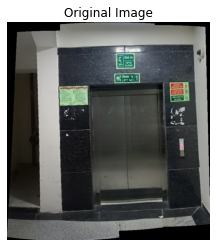

In [6]:
# Plotting Original Resolution image
plot_image(tf.squeeze(hr_image), title="Original Image")
save_image(tf.squeeze(hr_image), filename="Original Image")

In [7]:
SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"
model = hub.load(SAVED_MODEL_PATH)
#using a pretrained ESRGAN for super resolution as I did not have enough time for training a GAN.

In [ ]:
start = time.time()
fake_image = model(hr_image)
fake_image = tf.squeeze(fake_image)
print("Time Taken: %f" % (time.time() - start))
#was facing OOM issuees while using the model on the given image and hence couldnt generate a high resolution image here.

In [ ]:
# Plotting Super Resolution Image
plot_image(tf.squeeze(fake_image), title="Super Resolution")
save_image(tf.squeeze(fake_image), filename="Super Resolution")